# Data

##### The dataset we will be using in this notebook is the "Tomato leaf disease detection"
The dataset includes images of different types of tomato leaf diseases which are:
* Bacterial spot
* Early blight
* Late blight
* Leaf Mold
* Septoria leaf spot
* Spider mites two spotted spider mites
* Target spot
* Tomato yellow leaf curl virus
* Tomato mosaic virus

And images of healthy tomato leaves:
* Healthy

Which means that we have a total of 10 categories at our data

# Preparing the Data
Lets start off by importing our data then preparing it for training and will also explore the data.

In [86]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
from PIL import Image

import os
import numpy as np
import pathlib

import warnings
warnings.filterwarnings("ignore")

In [87]:
data_dir =r"D:\DATA SCEINCE DATASETS\Deep learning\CNN\Tomato_Leaf\tomato\train" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/DATA SCEINCE DATASETS/Deep learning/CNN/Tomato_Leaf/tomato/train')

# Separating our categories

##### I reduced our data's number because its exceeding the available allocation of memory


In [90]:
bacterial_spot = list(data_dir.glob('Tomato___Bacterial_spot/*'))[:300]
early_blight = list(data_dir.glob('Tomato___Early_blight/*'))[:300]
late_blight = list(data_dir.glob('Tomato___Late_blight/*'))[:300]
leaf_mold = list(data_dir.glob('Tomato___Leaf_Mold/*'))[:300]
septoria_leaf_spot = list(data_dir.glob('Tomato___Septoria_leaf_spot/*'))[:300]
spider_mites_two_spotted_spider_mites = list(data_dir.glob('Tomato___Spider_mites Two-spotted_spider_mite/*'))[:300]
target_spot = list(data_dir.glob('Tomato___Target_Spot/*'))[:300]
tomato_yellow_leaf_curl_virus = list(data_dir.glob('Tomato___Tomato_Yellow_Leaf_Curl_Virus/*'))[:300]
tomato_mosaic_virus = list(data_dir.glob('Tomato___Tomato_mosaic_virus/*'))[:300]
healthy = list(data_dir.glob('Tomato___healthy/*'))[:300]

# Checking sample


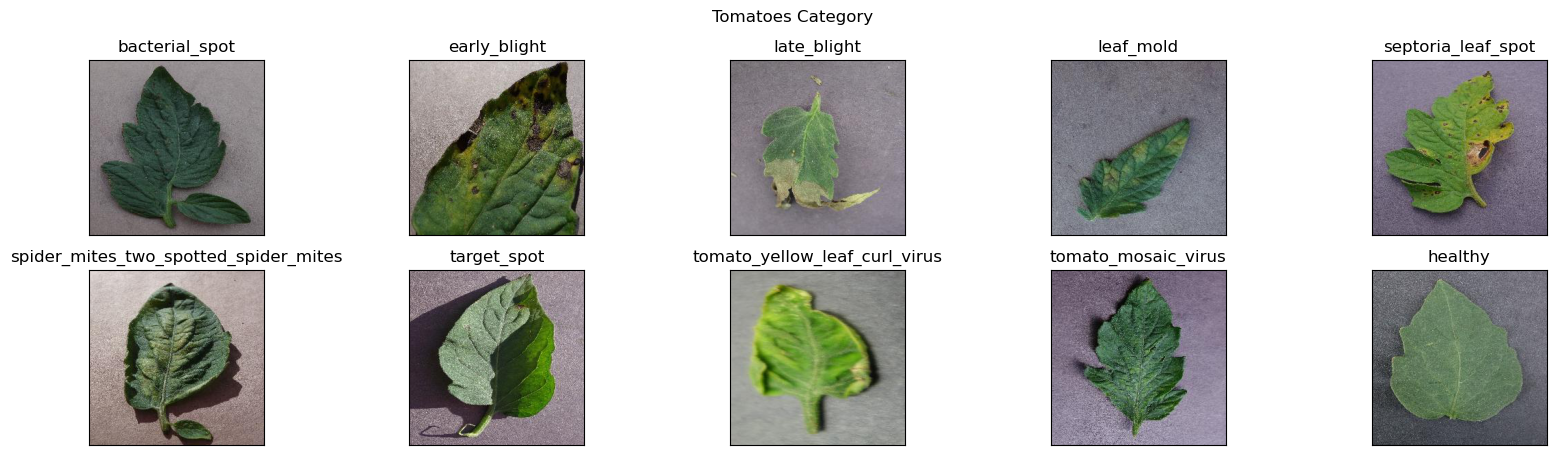

In [92]:
fig, ax = plt.subplots(2, 5, figsize=(20,5))

fig.suptitle('Tomatoes Category')

labels = ['bacterial_spot', 'early_blight', 'late_blight', 'leaf_mold', 'septoria_leaf_spot', 
            'spider_mites_two_spotted_spider_mites', 'target_spot', 'tomato_yellow_leaf_curl_virus', 
            'tomato_mosaic_virus', 'healthy'] 

# Reading images
bacterial_spot_image = img.imread(bacterial_spot[0])
early_bright_image = img.imread(early_blight[0])
late_blight_image = img.imread(late_blight[0])
leaf_mold_image = img.imread(leaf_mold[0])
septoria_leaf_spot_image = img.imread(septoria_leaf_spot[0])
spider_mites_two_spotted_spider_mites_image = img.imread(spider_mites_two_spotted_spider_mites[0])
target_spot_image = img.imread(target_spot[0])
tomato_yellow_leaf_curl_virus_image = img.imread(tomato_yellow_leaf_curl_virus[0])
tomato_mosaic_virus_image = img.imread(tomato_mosaic_virus[0])
healthy_image = img.imread(healthy[0])

images = [bacterial_spot_image, early_bright_image, late_blight_image, leaf_mold_image, septoria_leaf_spot_image, 
         spider_mites_two_spotted_spider_mites_image, target_spot_image, tomato_yellow_leaf_curl_virus_image, 
         tomato_mosaic_virus_image, healthy_image]
 
# Showing images
for i in range (5):
    ax[0, i].imshow(images[i])
for i in range (5):
    ax[1, i].imshow(images[i+5])

# Remove ticks  
for i in range (5):
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])
for i in range (5):
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])

# Label axes
for i in range (5):
    ax[0, i].set_title(labels[i])
for i in range (5):
    ax[1, i].set_title(labels[i+5])

plt.show()

##### Assigning a separate dictionary for images and their corresponding labels

In [94]:
# Contains the images path
df_images = {
    'bacterial_spot': bacterial_spot,
    'early_blight': early_blight,
    'late_blight': late_blight,
    'leaf_mold': leaf_mold,
    'septoria_leaf_spot': septoria_leaf_spot,
    'spider_mites_two_spotted_spider_mites': spider_mites_two_spotted_spider_mites,
    'target_spot' : target_spot,
    'tomato_yellow_leaf_curl_virus': tomato_yellow_leaf_curl_virus,
    'tomato_mosaic_virus' : tomato_mosaic_virus,
    'healthy': healthy
}

# Contains numerical labels for the two categories
df_labels = {
    'bacterial_spot': 0,
    'early_blight': 1,
    'late_blight': 2,
    'leaf_mold': 3,
    'septoria_leaf_spot': 4,
    'spider_mites_two_spotted_spider_mites': 5,
    'target_spot' : 6,
    'tomato_yellow_leaf_curl_virus': 7,
    'tomato_mosaic_virus' : 8,
    'healthy': 9
}

##### *Since the MobileNetv2 training images dimensions are 224 by 224 by 3, we have to reshape our categories into tha*

In [96]:
img = cv2.imread(str(df_images['bacterial_spot'][0])) # Converting it into numerical arrays
img.shape # Its currently 256 by 256 by 3

(256, 256, 3)

In [97]:
X, y = [], [] # X = images, y = labels

for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])

##### Splitting the data and standarization

In [99]:
# Standarizing
X = np.array(X)
y = np.array(y)
X = X/255

##### Splitting our data

In [101]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

# Making the model

##### With the use of MobileNetv2

In [104]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv2 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [105]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(224, 224, 3)),
    keras.layers.Lambda(lambda x: mobile_net(x)),  #  Fix: Properly wrap KerasLayer
    keras.layers.Dense(num_label, activation='softmax')  # Output layer
])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_6 (Lambda)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,810 (50.04 KB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training!

In [107]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - acc: 0.3446 - loss: 1.9379
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - acc: 0.7688 - loss: 0.8243
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - acc: 0.8449 - loss: 0.5931
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 236ms/step - acc: 0.8711 - loss: 0.4857
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - acc: 0.8917 - loss: 0.4183
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - acc: 0.9057 - loss: 0.3720
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - acc: 0.9269 - loss: 0.3216
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - acc: 0.9290 - loss: 0.2975
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 234ms/step - acc: 0.9414 - loss: 0.2853
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 232ms/step - acc: 0.9466 - loss: 0.2415


# Evaluation

In [109]:
model.evaluate(x_test,y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - acc: 0.8798 - loss: 0.4147


[0.40937960147857666, 0.8813333511352539]

In [110]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test,batch_size=64,verbose=1)
y_pred_bool=np.argmax(y_pred,axis=1)

print(classification_report(y_test,y_pred_bool))

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 531ms/step
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        92
           1       0.69      0.84      0.76        57
           2       0.90      0.77      0.83        74
           3       0.95      0.87      0.91        79
           4       0.88      0.75      0.81        71
           5       0.93      0.88      0.90        84
           6       0.82      0.83      0.82        65
           7       1.00      0.95      0.97        82
           8       0.93      0.99      0.96        77
           9       0.97      0.94      0.96        69

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.89      0.88      0.88       750



##### We got a total accuracy of 88% which is not bad especially because we reduced the data to make the training faster and for it to not exeed its allocation memory.